# <font color='maroon'>Basic Statistics and Visualization</font>


In this lesson we begin to explore data. But what is data? Data is information and it has different data types. Quantitative or numerical data is data that can be measured. Examples are weight, height, distance travelled. These data may be represented by ordinal, interval or ratio scales of measurement and can be analysed statistically. Qualitative or categorical data cannot be expressed as a number but can be represented by a number. Examples are gender, preferences, survey results, etc. We see on how to visualize quantitative and qualitative data.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline  

Again, we use `inline` to plot the graphs _directly in the notebook_.

## Summarizing data

Let's use the Pandas library to find the mean, median, max, min and standard deviation. To produce these estimates, we used the `describe` function on the dataframe. We will begin with loading a dataset. For this lesson, we will be using data from a study of cigarette-smoking expectant mothers and the effects of their smoking on their babies.

In [3]:
data = pd.read_csv('smoking-and-pregnancy.csv', sep=';')

Investigate the dataset. What are the columns, what are the column names?

In [4]:
data.columns

Index(['GestationalAge', 'Sex', 'Birthweight', 'Birthlength', 'Smoking',
       'CigarettesPerDay'],
      dtype='object')

What kind of data types are in the columns? Use the `info()` function to determine this.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
GestationalAge      128 non-null int64
Sex                 128 non-null object
Birthweight         128 non-null float64
Birthlength         126 non-null float64
Smoking             128 non-null object
CigarettesPerDay    23 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.1+ KB


How big is the dataset?

In [6]:
data.shape

(128, 6)

What does the data look like?

In [7]:
data.head()

,GestationalAge,Sex,Birthweight,Birthlength,Smoking,CigarettesPerDay
0,281,boy,3.35,54.0,Y,NaN
1,265,girl,3.72,48.0,Y,NaN
2,274,girl,3.10,50.0,N,NaN
3,291,girl,4.58,57.0,Y,15.0
4,290,boy,3.20,49.0,N,NaN


The data is on the smoking habits of women during pregnancy. The time of pregnancy, sex of baby, weight and length of baby, as well as their smoking habits were recorded.

Let's use the describe function to get summary statistics.

In [8]:
data.describe()

,GestationalAge,Birthweight,Birthlength,CigarettesPerDay
count,128.00000,128.000000,126.000000,23.000000
mean,279.03125,3.538359,52.075397,9.086957
std,13.11604,0.614818,2.493245,5.409697
min,207.00000,0.630000,41.000000,1.000000
25%,274.00000,3.200000,50.250000,5.000000
50%,281.00000,3.580000,52.000000,10.000000
75%,287.00000,3.942500,54.000000,13.500000
max,300.00000,5.060000,59.000000,20.000000


### Visualizing summary statistics

Let's pick a column and use a box-and-whisker plot to visualize some of the results. We'll use the seaborn visualization library to plot a box-and-whisker plot. Seaborn generates pleasing visuals. This is why we use it.

In [9]:
import seaborn as sns

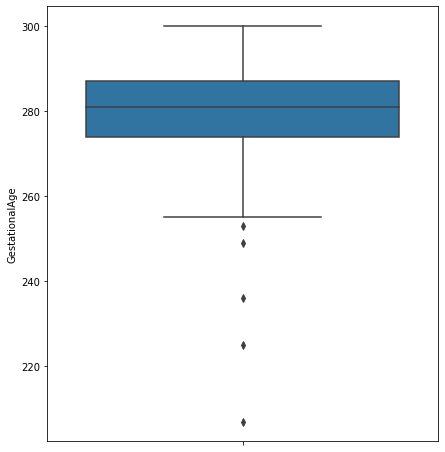

In [10]:
fig, ax = plt.subplots(figsize=(7,8))       # initialize the figure and axes objects
sns.boxplot(x='GestationalAge',     # column name to be plotted
            data=data,             # where the column data comes from
            orient='v')            # vertically orient the box plot

### Exercise

Box-and-whisker plots are useful when you want to compare two data sets. You can present the box plots side by side and see the differences between the data sets. Pick any two suitable columns from the dataset and compare the two data sets. Discuss notable differences.

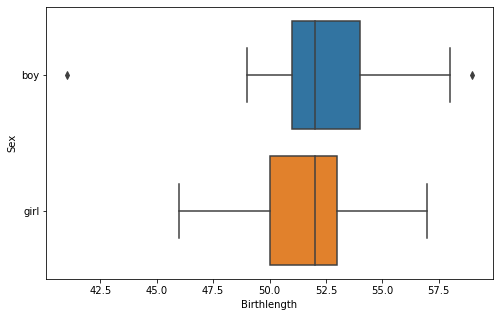

In [13]:
# your answer
fig, ax = plt.subplots(figsize=(8,5)) # Initialise the figure and axes objects  plt.subplots(2,2)
sns.boxplot(x='Birthlength', y = 'Sex',
            data=data,
           orient= 'h')

In [14]:
data.groupby(['Sex']).min()

,GestationalAge,Birthweight,Birthlength,Smoking,CigarettesPerDay
Sex,,,,,
boy,225,1.49,41.0,N,1.0
girl,207,0.63,46.0,N,1.0


In [15]:
data.groupby(['Sex']).max()

,GestationalAge,Birthweight,Birthlength,Smoking,CigarettesPerDay
Sex,,,,,
boy,300,5.06,59.0,Y,15.0
girl,296,4.75,57.0,Y,20.0


In [16]:
data.groupby(['Sex']).mean()

,GestationalAge,Birthweight,Birthlength,CigarettesPerDay
Sex,,,,
boy,281.169231,3.643231,52.484615,7.777778
girl,276.825397,3.430159,51.639344,9.928571


## Interpretation of the figure
The minimun birthlength of a girl is 46.0 and It is 49.0 for a boy. And the maximun birthlength for a girl is 57.0 and for a boy, it is 59.0. 25% of girls are born at most 50.0 length and 25% of girls are born at least 53.0 length. Whereas 25% of boys are born at most 51.0 length and 25% of boys are born at least 53.5 length.
And finally, 50% of girls are born at under 51.64 length and 50% of girls born over 51.64 length whereas 50% of boys are born under 52.48 length and 50% of boys born over 52.48 length. 

We can also plot box-and-whisker plots according to different groups. In our dataset, we had women who smoked during pregnancy and those that didn't smoke during pregnancy. We can create two box-and-whisker plots side by side to see the differences betweeen these two groups.

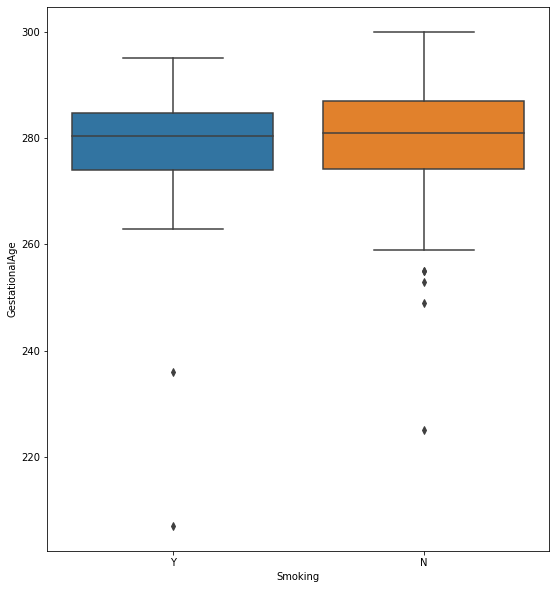

In [17]:
fig, ax = plt.subplots(figsize=(9,10))
sns.boxplot(x='Smoking', y='GestationalAge', data=data)

We can see from the side by side comparison that the group of nonsmokers had a median slightly higher than the smokers. The gestational age of both groups, smokers and nonsmokers, are evenly distributed around the median value. We observe several outlying values in both groups.

## Visualizing continuous or quantitative data

We learned earlier that histograms are good way to display the structure of continuous data. A histogram shows the frequency distribution of data points within a certain range called a bin. We can plot histograms using our own ranges instead of relying on the default settings. A histogram will reveal which bin has a high frequency of data points and which ranges have extreme data points. Using Pandas, let's see what the `Birthweight` column looks like.

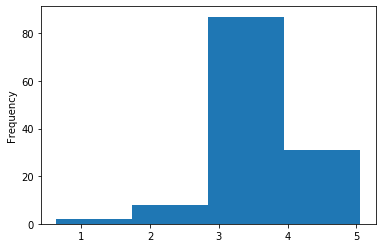

In [18]:
birth = data['Birthweight']                         # get the Birthweight column
bins = np.linspace(birth.min(), birth.max(), num=5) # create bins for the birth weights
birth.plot(kind='hist', bins=bins) # plot data in bins
        # 

We see that the data data points centred in the range $3 \leq x < 4$. We see a peak in the data. To the left of the peak, we observe a few data points that stretch from 0.5 to 2.5. This shape does not occur to the right of the peak. The data is skewed to the left, indicated by the tail stretching off to the left.

# Visualizing qualitative data

Some data points are stored as discrete values which represent groups or categories. Qualitative data often represents information such as gender, marital status, blood groups, etc. Qualitative data can take on numerical values (e.g., 1 indicate male, 0 indicating female). We can use bar graphs to by grouping data into two categories, whether a mother smoked or not, and counting how many mothers fall into these two groups.

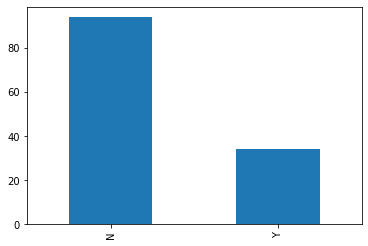

In [19]:
data['Smoking'].value_counts().plot(kind='bar') #plot a bar chart showing counts of mothers who were smokers(Y) & non-smokers(N)

The output groups those mothers who smoked during pregnancy and those who didn't. We can also plot a bar group to group the babies into two groups -- boy or girl.

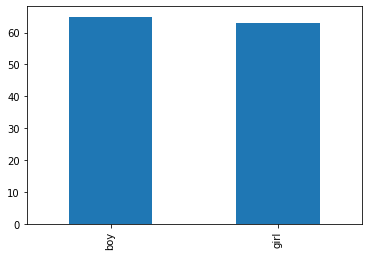

In [20]:
data['Sex'].value_counts().plot(kind='bar')

We can divide the data further according to the different columns in the dataset. We can group the data into baby boys whose parents smoked or didn't smoke, and baby girls into whose parents smoked or didn't smoke during pregnancy.

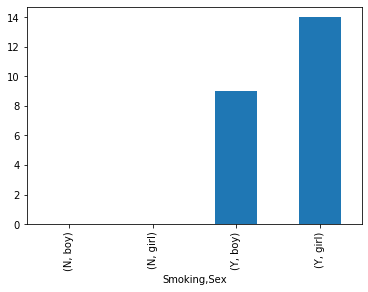

In [21]:
df = data.groupby(['Smoking','Sex']).count() # indicate the columns to group by
df['CigarettesPerDay'].plot.bar()

The column bar graph shows the CigarettesPerDay against the boys and girls whose mothers smoked and didn't smoke during pregnancy.  We observe 9 data points of boys whose mother indicated smoking during pregnancy. We observe 14 data points of girls whose mothers smoked during pregnancy. Note this these values have nothing to do with the actually number of cigarettes that a mother smoked during pregnancy. 

There are many functions you can perform on the dataframe with the function `groupby()`. Let's group the data by `Smoking` and get the mean values. We can find the mean of our grouped data set. 

In [22]:
data.groupby(['Smoking']).mean()

,GestationalAge,Birthweight,Birthlength,CigarettesPerDay
Smoking,,,,
N,279.765957,3.593723,52.196809,NaN
Y,277.000000,3.385294,51.718750,9.086957


The groupby function divides the dataset into two groups. We then proceed to calculate the mean of the remaining columns per group.

### Exercise

Create a dataframe containing the columns Birthweight and Smoking. See if there is a difference between children of smokers and non-smokers. 

In [23]:
# Let us create a dataframe containing the columns Birthweight and Smoking.
Weight_Smoking = data[['Birthweight', 'Smoking']]
Weight_Smoking

,Birthweight,Smoking
0,3.35,Y
1,3.72,Y
2,3.10,N
3,4.58,Y
4,3.20,N
...,...,...
123,3.20,N
124,3.52,N
125,3.40,Y
126,3.74,Y


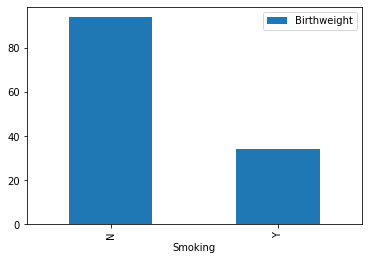

In [24]:
#Let us check at the difference between children of smokers and non-smokers
Weight_Smoking.groupby(['Smoking']).count().plot(kind='bar')

In [25]:
Weight_Smoking.groupby(['Smoking']).count()

,Birthweight
Smoking,
N,94
Y,34


## Interpretation
94 children are children of non-smokers and 34 are children of smokers mothers. 

### A scattermatrix

A scattermatrix combines scatter plots with histograms or density plots. The result is a grid of plots that displays a scatterplot and histogram for each data variable against another data variable. Pandas provides plotting tools for this functionality.

In [28]:
from pandas.tools import plotting

ModuleNotFoundError: No module named 'pandas.tools'

In [0]:
plotting.scatter_matrix(data[['GestationalAge','Birthweight', 'Birthlength']], diagonal='kde')

### Exercise

The results of the scatter matrix above did not take into account the two sub-populations in the data, namely the boys and the girls. Plot a scatter matrix for the boys only, and another for girls. What differences do you notice?

In [0]:
# your answer